In [1]:
import tensorflow as tf
import numpy as np

# Create a constant op
hello = tf.constant('Hello, TensorFlow!')

# Print the tensor directly (eager execution)
print(hello)

TensorArray =  tf.constant([1, 2, 3, 4, 5, 6])

print(TensorArray)

Array1 = np.array([1, 2, 3, 4, 5, 6])

print(Array1)

TensorArray2 = tf.constant(Array1, shape=(2, 3) )

print(TensorArray2)

print(TensorArray2.shape)

print(TensorArray2.dtype)

print(TensorArray2.numpy())

print(TensorArray2.ndim)

print(TensorArray2.dtype)

print(TensorArray2.device)

#help(tf.Variable)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)
tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)
[1 2 3 4 5 6]
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int64)
(2, 3)
<dtype: 'int64'>
[[1 2 3]
 [4 5 6]]
2
<dtype: 'int64'>
/job:localhost/replica:0/task:0/device:CPU:0


In [2]:
# Create a constant op

a = tf.constant(300)

# Create a variable op
b = tf.Variable(100)

# Add the two ops
c = a + b

# Print the value of c (eager execution)
print(c)

# Update the value of b
b.assign(200)

# Print the value of c again (eager execution)
print(c)

print(b)

tf.Tensor(400, shape=(), dtype=int32)
tf.Tensor(400, shape=(), dtype=int32)
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=200>


In [3]:
# Create a constant tensor
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# Perform tensor addition

c = tf.add(a, b)

# Perform tensor multiplication

d = tf.matmul(a, b)

print("Tensor c (Addition):\n", c.numpy())
print("Tensor d (Multiplication):\n", d.numpy())

Tensor c (Addition):
 [[ 6  8]
 [10 12]]
Tensor d (Multiplication):
 [[19 22]
 [43 50]]


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten the input images from 28x28 to 784
    layers.Dense(128, activation='relu'),  # First dense layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),                   # Dropout layer with a rate of 20%
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam',  # Use Adam optimizer
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy loss
              metrics=['accuracy'])  # Track accuracy during training

# Train the model
model.fit(x_train, y_train, epochs=5)  # Train for 5 epochs

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)  # Evaluate the model on the test set

print('\nTest accuracy:', test_acc)  # Print the test accuracy

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8583 - loss: 0.4869
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9534 - loss: 0.1547
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.9666 - loss: 0.1122
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.9711 - loss: 0.0902
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.9765 - loss: 0.0748
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9736 - loss: 0.0879

Test accuracy: 0.9772999882698059


The MNIST dataset is loaded and preprocessed.
A simple neural network with one hidden layer is built.

The model is trained for 10 epochs with a batch size of 32.

During training, the model will go through the entire dataset 10 times (epochs) and update its weights every 32 samples (batch size).

In [12]:
#Step 5: Save and Load the Model

# You can save the trained model and load it later for inference or further training.

# Save the Model

model.save('my_model.keras')

#Load the Model

new_model = tf.keras.models.load_model('my_model.keras')

In [13]:
#Step 6: Predict with the Model

#Use the trained model to make predictions.

predictions = new_model.predict(x_test)  # Make predictions on the test set

print(predictions[0])  # Predictions for the first test image
print(predictions[1])  # Predictions for the second test image
print(predictions[2])  # Predictions for the third test image

print("Predicted class:", tf.argmax(predictions[0]))  # Predicted class for the first test image

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[6.4291054e-01 4.1791114e-07 6.9895206e-04 1.5466468e-06 1.2373882e-06
 3.1248015e-01 4.3499738e-02 1.3370263e-04 1.9875994e-04 7.4934105e-05]
[2.9551197e-02 1.5044141e-02 3.8530857e-06 2.7090922e-01 3.0761677e-07
 2.0719508e-03 9.1203884e-04 2.5896498e-03 5.7964842e-03 6.7312127e-01]
[1.3215337e-02 7.7459365e-03 1.2478473e-06 1.8906476e-02 8.1458637e-07
 8.7946868e-01 6.2018124e-05 6.9010392e-02 5.0436780e-03 6.5453774e-03]
Predicted class: tf.Tensor(0, shape=(), dtype=int64)


 In this example, we'll create a basic neural network for image classification using the Fashion MNIST dataset.

In [8]:
import tensorflow as tf

from tensorflow.keras import layers, models

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt


# Load the Fashion MNIST dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Preprocess the data

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)

In [10]:
# Build the deep learning model

model = models.Sequential() # deep learning sequential model

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model

model.compile(optimizer='adam',

              loss='categorical_crossentropy',

              metrics=['accuracy'])


# Train the model

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


# Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7374 - loss: 0.7147 - val_accuracy: 0.8566 - val_loss: 0.3871
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8756 - loss: 0.3398 - val_accuracy: 0.8863 - val_loss: 0.3160
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8962 - loss: 0.2844 - val_accuracy: 0.8992 - val_loss: 0.2851
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9058 - loss: 0.2498 - val_accuracy: 0.9005 - val_loss: 0.2744
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9156 - loss: 0.2262 - val_accuracy: 0.9037 - val_loss: 0.2691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9242 - loss: 0.2042 - val_accuracy: 0.9074 - val_loss: 0.2633
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9306 - loss: 0.1866 - val_accuracy: 0.9100 - val_loss: 0.2584
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9363 - loss: 0

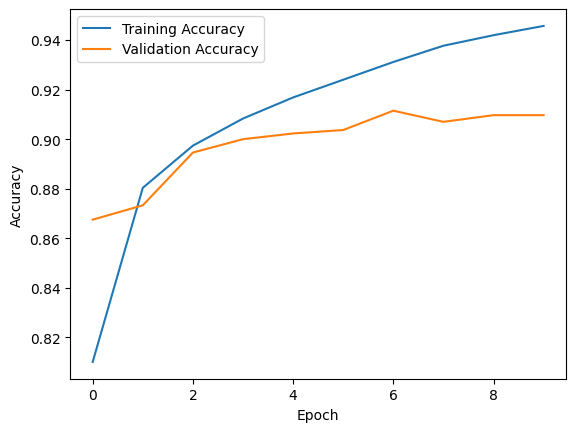

In [14]:
# Plot training history

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

We use the Fashion MNIST dataset, which consists of grayscale images of 10 different types of clothing items.

The data is preprocessed by normalizing pixel values to the range [0, 1].

We build a convolutional neural network (CNN) using TensorFlow and Keras.

The model is compiled with the Adam optimizer and categorical crossentropy loss for multiclass classification.

The model is trained for 10 epochs.

The test accuracy is evaluated, and the training history is plotted.


This example is a basic introduction to building a deep learning model
for image classification using TensorFlow and Keras.

Let's walk through a step-by-step guide to building, training, and evaluating a simple Artificial Neural Network (ANN) using TensorFlow and Keras on a popular dataset.

We'll use the Fashion MNIST dataset, which is similar to the MNIST dataset but consists of clothing items.

The Fashion MNIST dataset is a popular benchmark in the field of computer vision and machine learning, often used as a drop-in replacement for the classic MNIST dataset. It serves as a more challenging alternative with more complex and realistic images. Here’s an introduction to the Fashion MNIST dataset:
Overview

•	Dataset Size: Fashion MNIST consists of 70,000 grayscale images of fashion items.

•	Image Size: Each image is 28x28 pixels.

•	Classes: There are 10 categories or classes in Fashion MNIST, each representing a different type of clothing or accessory.

•	Purpose: It serves as a benchmark for machine learning algorithms to classify images of clothing items into their respective categories.

Classes in Fashion MNIST
The dataset includes the following classes:
1.	T-shirt/top
2.	Trouser
3.	Pullover
4.	Dress
5.	Coat
6.	Sandal
7.	Shirt
8.	Sneaker
9.	Bag
10.	Ankle boot


Dataset Details

•	Training Set: Contains 60,000 labeled images used for training machine learning models.

•	Test Set: Contains 10,000 labeled images used to evaluate the performance of trained models.

•	Label Encoding: Each image is associated with a single label from 0 to 9, representing one of the 10 classes.

•	Distribution: The dataset is well-balanced, meaning each class has an equal number of examples.

Usage in Research and Education
1.     Benchmarking: Researchers use Fashion MNIST to compare the performance of different machine learning models and algorithms in image classification tasks.

2.     Teaching: It is widely used in educational settings to teach concepts of computer vision, deep learning, and neural networks due to its simplicity and clear task definition.

Example Applications
•	Image Classification: Train a model to classify images of clothing items into one of the 10 categories.

•	Transfer Learning: Pre-train models on Fashion MNIST and transfer knowledge to more complex datasets or tasks.

•	Model Comparison: Use Fashion MNIST to evaluate the effectiveness and efficiency of various machine learning algorithms.

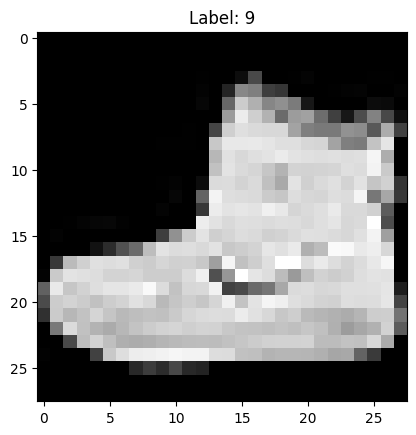

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display the first image in the training data
plt.imshow(x_train[0], cmap='gray')

plt.title(f"Label: {y_train[0]}")

plt.show()

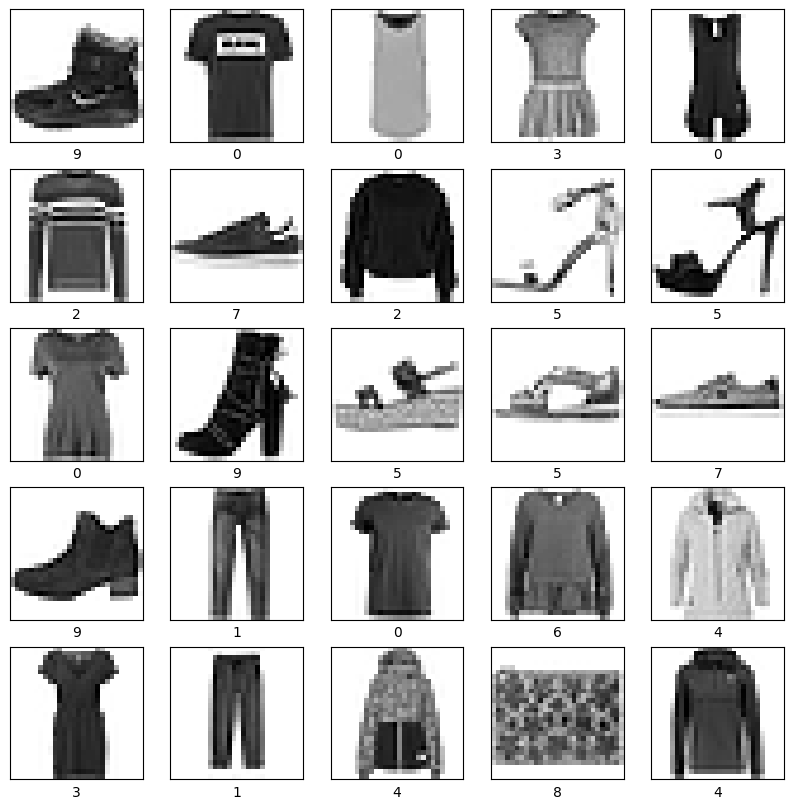

In [28]:
# Display more images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [29]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5413 - accuracy: 0.8094 - val_loss: 0.4187 - val_accuracy: 0.8443
Epoch 2/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4041 - accuracy: 0.8524 - val_loss: 0.3657 - val_accuracy: 0.8662
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3701 - accuracy: 0.8654 - val_loss: 0.3515 - val_accuracy: 0.8672
Epoch 4/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3486 - accuracy: 0.8721 - val_loss: 0.3290 - val_accuracy: 0.8818
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8757

Test accuracy: 0.8756999969482422


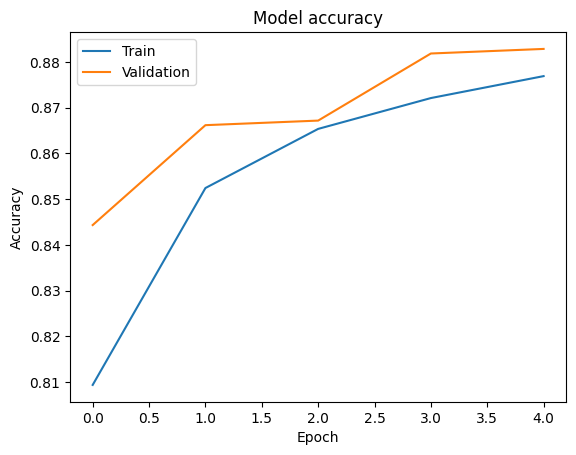

In [30]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

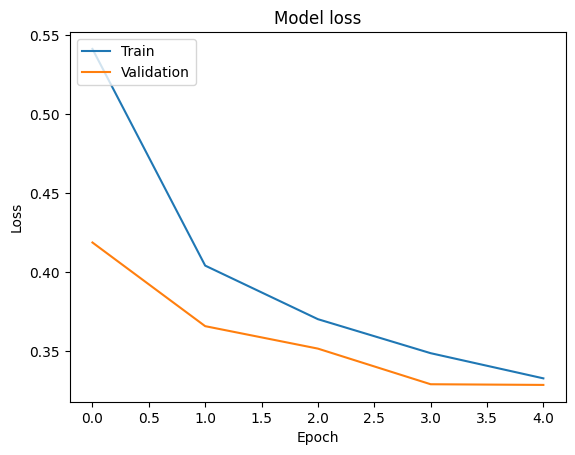

In [31]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step
9
2
1


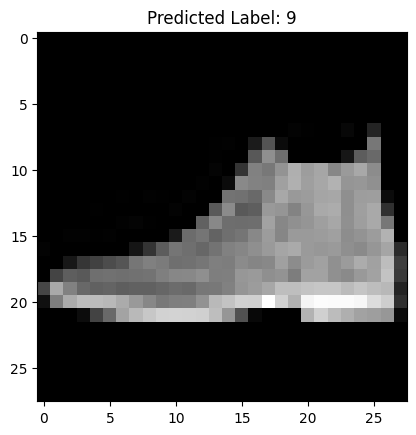

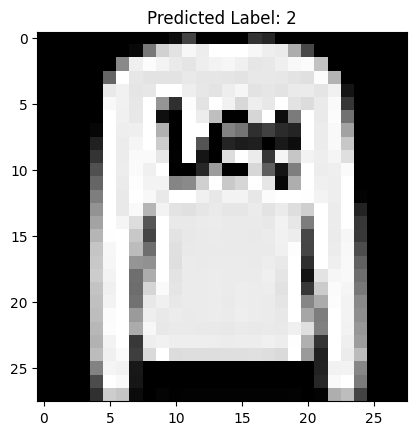

In [38]:
# Predict the labels of the test images
predictions = model.predict(x_test)

# Print the predicted label for the first test image
print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))
print(np.argmax(predictions[2]))

# Display the first test image
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")

plt.show()

# Display the Second test image
plt.imshow(x_test[1], cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[1])}")
plt.show()

Step-by-step example of building and training a simple Recurrent Neural Network (RNN)

 Example of building and training a simple Recurrent Neural Network (RNN) using TensorFlow and Keras.

 We'll use a synthetic time series dataset for simplicity.

In [39]:
#import the necessary libraries to build and train your RNN.

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

(1000,)
1
float64
[-0.1030338   0.14229397  0.30923995  0.38466791  0.60646806  0.55258772
  0.63485177  0.81560242  0.8350077   1.00697574  0.76526638  0.81103092
  1.03068392  0.80390039  0.83362455  0.79645747  0.80600889  0.67824856
  0.47420108  0.37688268  0.300105    0.15253101 -0.10040456 -0.15599309
 -0.32003205 -0.46311262 -0.7959663  -0.72967433 -0.74565426 -0.94387823
 -0.8379797  -0.92917441 -1.02282446 -0.99214091 -1.15312385 -0.91086018
 -0.82604207 -0.88332075 -0.71347405 -0.61851783 -0.48650429 -0.31439304
 -0.08866912 -0.02020298 -0.07254401  0.25139985  0.34038377  0.31552561
  0.63896818  0.66441359]


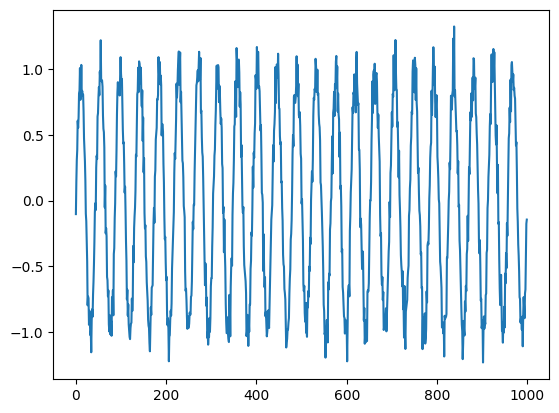

In [54]:
import seaborn as sns

# Generate synthetic data (sine wave + noise)
def generate_time_series(n_points):
    freq = np.random.rand() * 10 + 5  # random frequency between 5 and 15
    t = np.linspace(0, 10, n_points)  # time points
    X = np.sin(freq * t) + np.random.randn(n_points) * 0.1
    return X

n_points = 1000  # number of data points

series = generate_time_series(n_points)

print(series.shape)
print(series.ndim)
print(series.dtype)
print(series[:50])

sns.lineplot(x=range(len(series)), y=series)
plt.show()

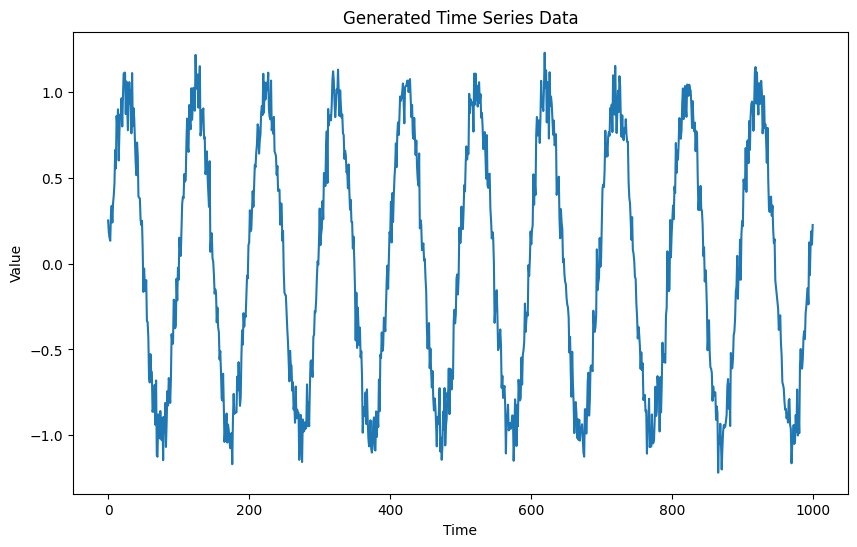

In [41]:
#Visualize the Data
#Plot the synthetic time series data to understand its structure.

plt.figure(figsize=(10, 6))
plt.plot(series)
plt.title('Generated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [58]:
#Step 5: Preprocess the Data
#Prepare the data for training the RNN.
# We'll create sequences of fixed length as input and the next value in the series as the target output.
# Function to create sequences for training

def create_sequences(series, window_size):
    X = []
    y = []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 20  # length of input sequences

X, y = create_sequences(series, window_size)

X = X.reshape(-1, window_size, 1)  # Reshape for RNN input (batch_size, sequence_length, input_dim)


print(X[:2])

print(y[:2])

print(X.shape)

print(y.shape)

[[[-0.1030338 ]
  [ 0.14229397]
  [ 0.30923995]
  [ 0.38466791]
  [ 0.60646806]
  [ 0.55258772]
  [ 0.63485177]
  [ 0.81560242]
  [ 0.8350077 ]
  [ 1.00697574]
  [ 0.76526638]
  [ 0.81103092]
  [ 1.03068392]
  [ 0.80390039]
  [ 0.83362455]
  [ 0.79645747]
  [ 0.80600889]
  [ 0.67824856]
  [ 0.47420108]
  [ 0.37688268]]

 [[ 0.14229397]
  [ 0.30923995]
  [ 0.38466791]
  [ 0.60646806]
  [ 0.55258772]
  [ 0.63485177]
  [ 0.81560242]
  [ 0.8350077 ]
  [ 1.00697574]
  [ 0.76526638]
  [ 0.81103092]
  [ 1.03068392]
  [ 0.80390039]
  [ 0.83362455]
  [ 0.79645747]
  [ 0.80600889]
  [ 0.67824856]
  [ 0.47420108]
  [ 0.37688268]
  [ 0.300105  ]]]
[0.300105   0.15253101]
(980, 20, 1)
(980,)


In [43]:
#Split the data into training and test sets.
#Typically, the last part of the sequence is used for testing in time series data.

split = int(0.8 * len(X))  # 80% training, 20% testing

X_train, X_test = X[:split], X[split:]

y_train, y_test = y[:split], y[split:]

In [44]:
#Create a simple RNN model using TensorFlow Keras.
model = Sequential([
    SimpleRNN(50, input_shape=(window_size, 1), activation='relu'),
    Dense(1)
])

In [46]:
#Compile the model specifying the optimizer, loss function, and metrics.

model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error for regression
              metrics=['mae'])  # Mean Absolute Error

In [63]:
#Train the RNN model using the training data.

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
25/25 [==============================] - 0s 8ms/step - loss: 0.0118 - mae: 0.0856 - val_loss: 0.0120 - val_mae: 0.0875
Epoch 2/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0118 - mae: 0.0862 - val_loss: 0.0126 - val_mae: 0.0873
Epoch 3/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0125 - mae: 0.0891 - val_loss: 0.0133 - val_mae: 0.0919
Epoch 4/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0130 - mae: 0.0900 - val_loss: 0.0123 - val_mae: 0.0869
Epoch 5/15
25/25 [==============================] - 0s 7ms/step - loss: 0.0125 - mae: 0.0876 - val_loss: 0.0125 - val_mae: 0.0889
Epoch 6/15
25/25 [==============================] - 0s 9ms/step - loss: 0.0122 - mae: 0.0882 - val_loss: 0.0124 - val_mae: 0.0877
Epoch 7/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0124 - mae: 0.0877 - val_loss: 0.0119 - val_mae: 0.0852
Epoch 8/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0119 - mae: 0.08

In [64]:
test_loss, test_mae = model.evaluate(X_test, y_test)  # Evaluate the model on the test data

print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0126 - mae: 0.0901
Test Loss: 0.0126
Test MAE: 0.0901


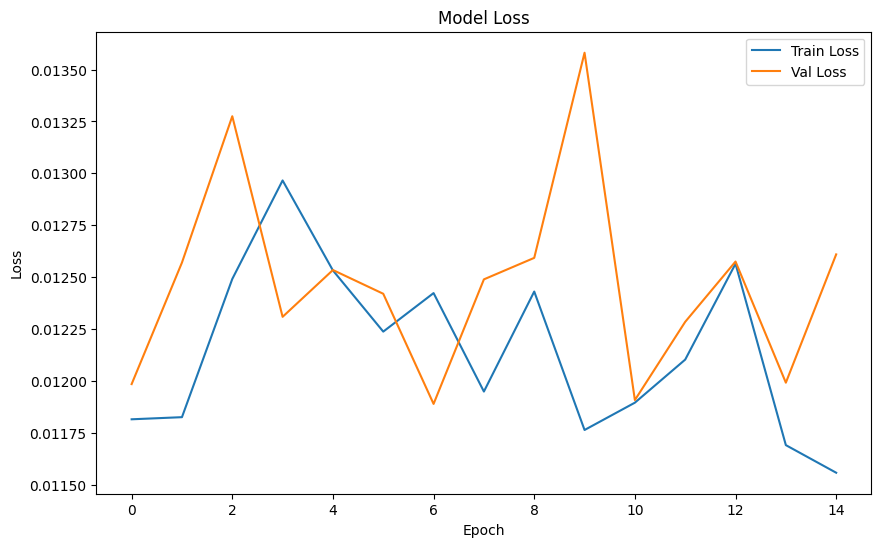

In [65]:
# Plot the training and validation loss and metrics (MAE) to visualize the model's learning process.

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

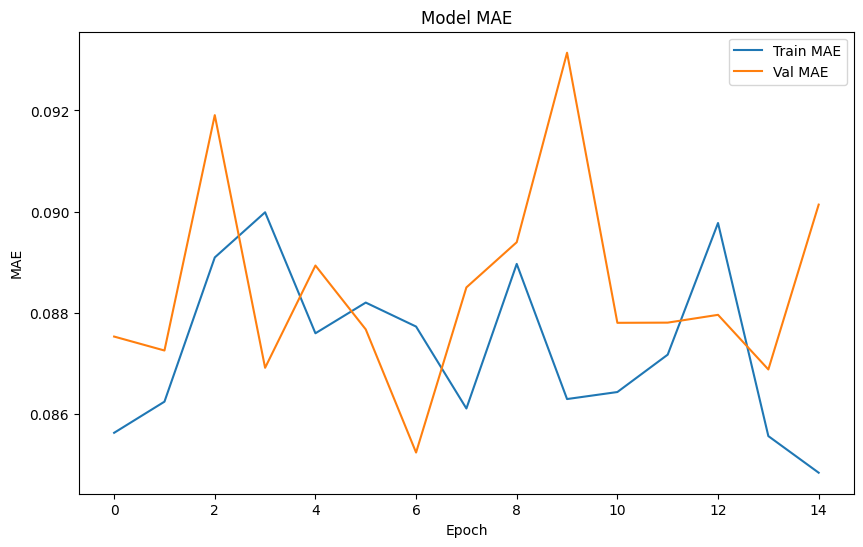

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

Explanation of Each Step
1.	Import Libraries: Import TensorFlow and other necessary modules for building the model and visualizing the data.
2.	Generate Synthetic Data: Create a synthetic time series dataset (sine wave with noise).
3.	Create Sequences: Generate sequences of fixed length as input and the next value in the series as the target output.
4.	Split Data: Split the data into training and test sets.
5.	Build RNN Model: Define a sequential model with a SimpleRNN layer for processing sequential data and a Dense layer for output.
6.	Compile Model: Specify the optimizer (Adam), loss function (Mean Squared Error for regression), and metrics (Mean Absolute Error).
7.	Train Model: Train the RNN model using the training data, specifying the number of epochs and using validation data for evaluation.
8.	Evaluate Model: Evaluate the model's performance on the test data using Mean Squared Error and Mean Absolute Error metrics.
9.	Visualize Training History: Plot the training and validation loss and metrics (MAE) over epochs to visualize the model's learning process.
This example provides a foundational understanding of building and training an RNN using TensorFlow and Keras, suitable for sequential data like time series. Adjustments and enhancements can be made based on specific use cases and datasets.

Step-by-step example of building and training a Convolutional Neural Network (CNN)

Let's walk through a step-by-step example of building and training a Convolutional Neural Network (CNN) using TensorFlow and Keras. We'll use the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

The CIFAR-10 dataset is a popular benchmark in the field of computer vision and machine learning. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.
Classes in CIFAR-10
The CIFAR-10 dataset consists of the following classes:
1.	Airplane
2.	Automobile
3.	Bird
4.	Cat
5.	Deer
6.	Dog
7.	Frog
8.	Horse
9.	Ship
10.	Truck

Dataset Details
•	Image Size: Each image in CIFAR-10 is of size 32x32 pixels.
•	Color Channels: Images are in RGB format, meaning each image has 3 color channels (Red, Green, Blue).
•	Training Set: Contains 50,000 labeled images used to train machine learning models.
•	Test Set: Contains 10,000 labeled images used to evaluate the performance of trained models.
•	Purpose: CIFAR-10 is commonly used for benchmarking image classification algorithms due to its manageable size and diversity of images.
Usage in Research and Education
1.     Benchmarking: Researchers often use CIFAR-10 to compare the performance of different machine learning models and algorithms in image classification tasks.
2.     Education: It is widely used in educational settings to teach concepts of computer vision, deep learning, and neural networks due to its accessibility and clear task definition.
Example Applications
•	Image Classification: Train a model to classify images into one of the 10 categories.
•	Object Detection: Use CIFAR-10 as a benchmark dataset for developing object detection algorithms.
•	Transfer Learning: Pre-train models on CIFAR-10 and transfer knowledge to more complex datasets or tasks.
Loading CIFAR-10 in Python
You can load CIFAR-10 using TensorFlow and Keras as follows: